In [104]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import io
import chess
import chess.pgn as cp
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:\\Users\\ujwal\\data\\stonybrook\\fall2019\\dataScienceFundamentals\\project\\dataset\\dataset190000.csv")

In [187]:
data191 = pd.read_csv("C:\\Users\\ujwal\\data\\stonybrook\\fall2019\\dataScienceFundamentals\\project\\dataset\\data191000.csv")

In [188]:
dfs = []
dfs.append(data)
dfs.append(data191)

In [189]:
data = pd.concat(dfs)

In [190]:
data.shape

(384205, 17)

In [192]:
data.reset_index(inplace=True, drop=True)

In [193]:
data

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,ECO,Opening,TimeControl,Termination,Moves
0,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/224ifIC9,Dikeuss,hikarufans,1-0,2019.09.01,00:00:04,1817,1806,7,-17,NaN,D02,"Queen's Pawn Game: Symmetrical Variation, Pseu...",600+0,Normal,1. d4 { [%clk 0:05:00] } 1... d5 { [%clk 0:10:...
1,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/JRbFTTJX,skankhunt593,Wosito,1-0,2019.09.01,00:00:04,1491,1419,6,-6,NaN,B00,Owen Defense,180+0,Time forfeit,1. e4 { [%clk 0:03:00] } 1... b6 { [%clk 0:03:...
2,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/TDlv0AjR,strompur,alchemist48,1-0,2019.09.01,00:00:04,2145,2015,4,-4,NaN,E71,King's Indian Defense: Makogonov Variation,600+0,Normal,1. d4 { [%clk 0:10:00] } 1... Nf6 { [%clk 0:10...
3,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/9HriX6Rx,Geroz,ficher2016,1-0,2019.09.01,00:00:04,1702,1695,17,-7,NaN,B00,Owen Defense,600+0,Normal,1. e4 { [%clk 0:10:00] } 1... b6 { [%clk 0:10:...
4,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/TECTBYsk,Violin_And_Viola,fasterfourier,1-0,2019.09.01,00:00:04,1683,1502,6,-4,NaN,C31,"King's Gambit, Falkbeer Countergambit Accepted",600+0,Normal,1. e4 { [%clk 0:10:00] } 1... e5 { [%clk 0:10:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384200,Rated Blitz game,https://lichess.org/QVW0gqAY,Kapwenge,Shubham18,1-0,2019.09.01,06:14:02,1629,1644,8,-7,NaN,A20,"English Opening: King's English Variation, Nim...",300+0,Normal,1. c4 { [%clk 0:05:00] } 1... e5 { [%clk 0:05:...
384201,Rated Blitz game,https://lichess.org/Kaz8VE91,Garoe1987,StreetChessKing,1-0,2019.09.01,06:14:03,1635,927,1,-1,NaN,A40,Queen's Pawn,240+3,Normal,1. d4 { [%clk 0:04:00] } 1... h5 { [%clk 0:04:...
384202,Rated Blitz game,https://lichess.org/tTj6VvXq,airat1983,gudiaz,1-0,2019.09.01,06:14:03,1826,1703,5,-4,NaN,D08,Queen's Gambit Refused: Albin Countergambit,180+0,Time forfeit,1. d4 { [%clk 0:03:00] } 1... d5 { [%clk 0:03:...
384203,Rated Blitz game,https://lichess.org/EG7JMU29,javad1996,ercins71,0-1,2019.09.01,06:14:03,1807,1846,-6,7,NaN,D02,Queen's Pawn Game: Zukertort Variation,180+0,Time forfeit,1. d4 { [%clk 0:03:00] } 1... d5 { [%clk 0:03:...


In [194]:
data.isnull().sum()

Event                   0
Site                    0
White                   0
Black                   0
Result                  0
UTCDate                 0
UTCTime                 0
WhiteElo                0
BlackElo                0
WhiteRatingDiff         0
BlackRatingDiff         0
WhiteTitle         384205
ECO                     0
Opening                 0
TimeControl             0
Termination             0
Moves                 554
dtype: int64

In [195]:
dataNotNull = data[data['Moves'].notnull()]

In [196]:
dataNotNull.isnull().sum()

Event                   0
Site                    0
White                   0
Black                   0
Result                  0
UTCDate                 0
UTCTime                 0
WhiteElo                0
BlackElo                0
WhiteRatingDiff         0
BlackRatingDiff         0
WhiteTitle         383651
ECO                     0
Opening                 0
TimeControl             0
Termination             0
Moves                   0
dtype: int64

In [197]:
evalData = dataNotNull[dataNotNull['Moves'].str.contains("eval")]

In [198]:
evalData.shape

(23347, 17)

<h2>BASELINE MODEL<h2>

In [200]:
baseline = evalData.copy()

In [201]:
baseline.dtypes

Event               object
Site                object
White               object
Black               object
Result              object
UTCDate             object
UTCTime             object
WhiteElo             int64
BlackElo             int64
WhiteRatingDiff      int64
BlackRatingDiff      int64
WhiteTitle         float64
ECO                 object
Opening             object
TimeControl         object
Termination         object
Moves               object
dtype: object

In [202]:
baseline['GameType'] = pd.np.where(baseline.Event.str.contains("Blitz"), "Blitz",
            pd.np.where(baseline.Event.str.contains("Bullet"), "Bullet",
                        pd.np.where(baseline.Event.str.contains("Rapid"), "Rapid",
                                    pd.np.where(baseline.Event.str.contains("Classical"), "Classical",
                                                "Correspondence"))))

In [203]:
baselineCols = ['Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 
                'TimeControl', 'Termination', 'GameType']

In [204]:
from sklearn.preprocessing import LabelEncoder
baseline['ECO'] = LabelEncoder().fit_transform(baseline['ECO'])
baseline['TimeControl'] = LabelEncoder().fit_transform(baseline['TimeControl'])
baseline['Termination'] = LabelEncoder().fit_transform(baseline['Termination'])
baseline['GameType'] = LabelEncoder().fit_transform(baseline['GameType'])

In [205]:
baseline['Result'] = pd.np.where(baseline.Result.str.contains("1-0"), "1",
            pd.np.where(baseline.Result.str.contains("0-1"), "0",
                        "2"))

In [206]:
baseline['Result'].value_counts()

1    11852
0    10975
2      520
Name: Result, dtype: int64

In [207]:
baseline['Result'] = baseline['Result'].astype(int)

In [208]:
baselineTrain = baseline[baselineCols]

In [209]:
baselineTrain.dtypes

Result             int32
WhiteElo           int64
BlackElo           int64
WhiteRatingDiff    int64
BlackRatingDiff    int64
ECO                int32
TimeControl        int32
Termination        int32
GameType           int32
dtype: object

In [210]:
baselineTrain.reset_index(inplace=True, drop=True)

In [293]:
baselineTrain.columns

Index(['Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff',
       'ECO', 'TimeControl', 'Termination', 'GameType'],
      dtype='object')

In [212]:
blTrainingSet, blTestSet = train_test_split(baselineTrain, test_size=0.2)

XTrain = blTrainingSet.drop('GameType',axis =1)
YTrain = blTrainingSet['GameType']
XTest = blTestSet.drop('GameType', axis =1)
YTest = blTestSet['GameType']

In [213]:
XTrain = XTrain.drop('TimeControl', axis =1)
XTest = XTest.drop('TimeControl', axis =1)

In [214]:
XTest

,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Termination
15466,1,1528,1545,7,-37,86,1
5228,0,1092,1595,-2,0,67,0
19995,0,1222,1289,-7,101,85,0
13421,1,1852,1876,21,-7,87,0
3448,0,1373,1426,-6,7,0,0
...,...,...,...,...,...,...,...
8855,1,2003,2054,12,-39,182,0
20490,1,1096,1096,7,-15,72,0
20708,1,1659,1705,8,-9,298,0
22485,0,1953,1790,-10,10,39,0


<h5>Game Type Prediction<h5>
    Baseline Model

In [215]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(XTrain, YTrain) 
predicted = neigh.predict(XTest)
acc = accuracy_score(YTest, predicted)
print(acc)

0.484796573875803


In [391]:
baselineTrain['isUpset']= 0

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [392]:
for i in range(0,len(baselineTrain)):
    if baselineTrain['Result'][i]== 0:
        if baselineTrain['BlackElo'][i]<baselineTrain['WhiteElo'][i]:
            baselineTrain['isUpset'][i]=1
    if baselineTrain['Result'][i]== 1:
        if baselineTrain['BlackElo'][i]>baselineTrain['WhiteElo'][i]:
            baselineTrain['isUpset'][i]=1

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ujwal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

In [397]:
baselineTrain['isUpset'].value_counts()

0    13456
1     9891
Name: isUpset, dtype: int64

In [401]:
fTrainingSet, fTestSet = train_test_split(baselineTrain, test_size=0.2)

In [402]:
XTrain = fTrainingSet.drop('isUpset',axis =1)
YTrain = fTrainingSet['isUpset']
XTest = fTestSet.drop('isUpset', axis =1)
YTest = fTestSet['isUpset']

In [403]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(XTrain, YTrain) 
predicted = neigh.predict(XTest)
acc = accuracy_score(YTest, predicted)
print(acc)

0.845610278372591


<h5>White Rating Prediction<h5>

In [219]:
XTrain = blTrainingSet.drop('WhiteElo',axis =1)
XTrain = XTrain.drop('BlackElo',axis =1)
YTrain = blTrainingSet['WhiteElo']
XTest = blTestSet.drop('WhiteElo', axis =1)
XTest = XTest.drop('BlackElo', axis =1)
YTest = blTestSet['WhiteElo']

In [220]:
# Linear Regression Model Creation
lin_reg = LinearRegression()
lin_reg.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
#predict on test data split
y_test_predictions_lin_reg = lin_reg.predict(XTest)
# print (len(y_test_predictions_lin_reg))
lin_mse = mean_squared_error(YTest, (y_test_predictions_lin_reg))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

322.5617835567131


<h2>Data Cleaning<h2>

In [222]:
cleanedEvalData = evalData.copy()

In [223]:
cleanedEvalData['GameType'] = pd.np.where(cleanedEvalData.Event.str.contains("Blitz"), "Blitz",
            pd.np.where(cleanedEvalData.Event.str.contains("Bullet"), "Bullet",
                        pd.np.where(cleanedEvalData.Event.str.contains("Rapid"), "Rapid",
                                    pd.np.where(cleanedEvalData.Event.str.contains("Classical"), "Classical",
                                                "Correspondence"))))


cleanedEvalData['ECO'] = LabelEncoder().fit_transform(cleanedEvalData['ECO'])
cleanedEvalData['TimeControl'] = LabelEncoder().fit_transform(cleanedEvalData['TimeControl'])
cleanedEvalData['Termination'] = LabelEncoder().fit_transform(cleanedEvalData['Termination'])
cleanedEvalData['GameType'] = LabelEncoder().fit_transform(cleanedEvalData['GameType'])

cleanedEvalData['Result'] = pd.np.where(cleanedEvalData.Result.str.contains("1-0"), "1",
            pd.np.where(cleanedEvalData.Result.str.contains("0-1"), "0",
                        "2"))

cleanedEvalData['Result'] = cleanedEvalData['Result'].astype(int)

___________________________________

<h2>INTERMEDIATE REPORT MODELS<h2>
___________________________________

In [224]:
irData = cleanedEvalData[['Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff',
       'ECO', 'TimeControl', 'Termination', 'Moves', 'GameType']]

In [225]:
irData.reset_index(inplace=True, drop=True)

In [226]:
irData['MovesCount'] = ''

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [227]:
#Moves Count
for i in range(0, irData.shape[0]):
    gamestring = io.StringIO(irData['Moves'][i])
    game = cp.read_game(gamestring)
    count=0
    if game is not None:
        for move in game.mainline_moves():
            count=count+1
    irData['MovesCount'][i]=count

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ujwal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [228]:
irData["WhiteCaptured"] = ""
irData["BlackCaptured"] = ""
irData.head()

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,GameType,MovesCount,WhiteCaptured,BlackCaptured
0,0,1435,1524,-5,6,4,27,0,1. Nf3 { [%eval 0.06] [%clk 0:03:00] } 1... Nc...,0,28,,
1,1,1550,1508,7,-16,94,104,0,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... c5 ...,4,43,,
2,1,2208,2030,4,-4,1,97,0,1. b3 { [%eval 0.11] [%clk 0:01:00] } 1... Nf6...,1,77,,
3,1,1327,1596,12,-12,62,56,0,1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... e6 ...,0,119,,
4,1,1053,1046,7,-7,4,56,0,1. Nf3 { [%eval 0.06] [%clk 0:05:00] } 1... d6...,0,73,,


In [229]:
for i in range(0, irData.shape[0]):
    board = chess.Board()
    if i%5000 == 0:
        print(i)
    gamestring = io.StringIO(irData['Moves'][i])
    game = cp.read_game(gamestring)
    if game is not None:
        for move in game.mainline_moves():
            board.push(move)
    boardMap = board.piece_map()
    blackCount = 0
    whiteCount =0
    for cell in boardMap:
        if str(boardMap[cell]).isupper():
            whiteCount= whiteCount+1
        elif str(boardMap[cell]).islower():
            blackCount = blackCount + 1
    irData['WhiteCaptured'][i] = 16 - whiteCount
    irData['BlackCaptured'][i] = 16 - blackCount

0


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5000
10000
15000
20000


In [230]:
irData['EloDifference'] = irData['WhiteElo'].astype(int) - irData['BlackElo'].astype(int)

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
irData["RemTimeAftFirstMoveWhite"] = ""
irData["RemTimeAftLastMoveWhite"] = ""
irData["RemTimeAftFirstMoveBlack"] = ""
irData["RemTimeAftLastMoveBlack"] = ""
irData['WhiteTotalEval'] = ''
irData['BlackTotalEval'] = ''

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [232]:
for i in range(0, len(irData['Moves'])):
    if i%5000 == 0:
        print(i)
    try:
        if irData['Termination'][i]!='Abandoned' and irData['Moves'][i] is not None:
            if 'eval' in irData['Moves'][i]:
                splitres = irData['Moves'][i].split(' } ')
                whiteEvalSum = 0
                blackEvalSum = 0

                for j in range(0, len(splitres)):
                    if j%2 == 0:
                        if '%eval ' in splitres[j]:
                            #if splitres[j].split(']')[0].split('%eval ')[1]=='#1':
                            #    whiteEvalSum = whiteEvalSum + 1
                            if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
                                whiteEvalSum = whiteEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
                    else:
                        if '%eval ' in splitres[j]:
                            #if '%eval ' in splitres[j] and splitres[j].split(']')[0].split('%eval ')[1]=='#1':
                            #    blackEvalSum = blackEvalSum + 1
                            if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
                                blackEvalSum = blackEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
                irData['WhiteTotalEval'][i] = whiteEvalSum
                irData['BlackTotalEval'][i] = blackEvalSum

                if 'clk' in irData['Moves'][i]:
                    irData["RemTimeAftFirstMoveWhite"][i] = splitres[0].split(']')[1].split('%clk ')[1]
                    irData["RemTimeAftFirstMoveBlack"][i] = splitres[1].split(']')[1].split('%clk ')[1]
                    length = len(splitres)
                    if length%2 == 0:
                        if '%eval ' in splitres[length-2]:
                            irData["RemTimeAftLastMoveWhite"][i] = splitres[length-2].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-2]:
                            irData["RemTimeAftLastMoveWhite"][i] = splitres[length-2].split(']')[0].split('%clk ')[1]
                        if '%eval ' in splitres[length-1]:
                            irData["RemTimeAftLastMoveBlack"][i] = splitres[length-1].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-1]:
                            irData["RemTimeAftLastMoveBlack"][i] = splitres[length-1].split(']')[0].split('%clk ')[1]
                    else:
                        if '%eval ' in splitres[length-2]:
                            irData["RemTimeAftLastMoveBlack"][i] = splitres[length-2].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-2]:
                            irData["RemTimeAftLastMoveBlack"][i] = splitres[length-2].split(']')[0].split('%clk ')[1]
                        if '%eval ' in splitres[length-1]:
                            irData["RemTimeAftLastMoveWhite"][i] = splitres[length-1].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-1]:
                            irData["RemTimeAftLastMoveWhite"][i] = splitres[length-1].split(']')[0].split('%clk ')[1]


            elif 'clk' in irData['Moves'][i]:
                splitres = irData['Moves'][i].split(' } ')
                irData["RemTimeAftFirstMoveWhite"][i] = splitres[0].split("]")[0].split('%clk ')[1]
                irData["RemTimeAftFirstMoveBlack"][i] = splitres[1].split("]")[0].split('%clk ')[1]
                length = len(splitres)
                if length%2 == 0:
                    irData["RemTimeAftLastMoveWhite"][i] = splitres[length-2].split("]")[0].split('%clk ')[1]
                    irData["RemTimeAftLastMoveBlack"][i] = splitres[length-1].split("]")[0].split('%clk ')[1]
                else:
                    irData["RemTimeAftLastMoveBlack"][i] = splitres[length-2].split("]")[0].split('%clk ')[1]
                    irData["RemTimeAftLastMoveWhite"][i] = splitres[length-1].split("]")[0].split('%clk ')[1]
    except:
        print(i)


0


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value i

5000
10000
15000
20000


In [233]:
irData.isnull().sum()

Result                      0
WhiteElo                    0
BlackElo                    0
WhiteRatingDiff             0
BlackRatingDiff             0
ECO                         0
TimeControl                 0
Termination                 0
Moves                       0
GameType                    0
MovesCount                  0
WhiteCaptured               0
BlackCaptured               0
EloDifference               0
RemTimeAftFirstMoveWhite    0
RemTimeAftLastMoveWhite     0
RemTimeAftFirstMoveBlack    0
RemTimeAftLastMoveBlack     0
WhiteTotalEval              0
BlackTotalEval              0
dtype: int64

In [234]:
irData.drop(irData[irData['RemTimeAftFirstMoveWhite']==''].index, inplace = True)
irData.drop(irData[irData['RemTimeAftLastMoveWhite']==''].index, inplace = True)
irData.drop(irData[irData['RemTimeAftFirstMoveBlack']==''].index, inplace = True)
irData.drop(irData[irData['RemTimeAftLastMoveBlack']==''].index, inplace = True)

In [235]:
irData.reset_index(inplace=True, drop=True)

In [236]:
irData.shape

(23271, 20)

In [237]:
irData['a']=''
irData['b']=''
irData['c']=''
irData['d']=''
for i in range(0,irData.shape[0]):
    irData['a'][i] = pd.Timedelta(str(irData['RemTimeAftFirstMoveWhite'][i])).seconds
    irData['b'][i] = pd.Timedelta(str(irData['RemTimeAftLastMoveWhite'][i])).seconds
    irData['c'][i] = pd.Timedelta(str(irData['RemTimeAftFirstMoveBlack'][i])).seconds
    irData['d'][i] = pd.Timedelta(str(irData['RemTimeAftLastMoveBlack'][i])).seconds

irData['RemTimeAftFirstMoveWhite'] = irData['a']
irData['RemTimeAftLastMoveWhite'] = irData['b']
irData['RemTimeAftFirstMoveBlack'] = irData['c']
irData['RemTimeAftLastMoveBlack'] = irData['d']

irData = irData.drop('a',axis =1)
irData = irData.drop('b',axis =1)
irData = irData.drop('c',axis =1)
irData = irData.drop('d',axis =1)

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarn

In [238]:
irData['MovesCount']= irData['MovesCount'].astype(int)
irData['WhiteCaptured']= irData['WhiteCaptured'].astype(int)
irData['BlackCaptured']= irData['BlackCaptured'].astype(int)
irData['WhiteTotalEval']= irData['WhiteTotalEval'].astype(float)
irData['BlackTotalEval']= irData['BlackTotalEval'].astype(float)
irData['RemTimeAftFirstMoveWhite']= irData['RemTimeAftFirstMoveWhite'].astype(int)
irData['RemTimeAftLastMoveWhite']= irData['RemTimeAftLastMoveWhite'].astype(int)
irData['RemTimeAftFirstMoveBlack']= irData['RemTimeAftFirstMoveBlack'].astype(int)
irData['RemTimeAftLastMoveBlack']= irData['RemTimeAftLastMoveBlack'].astype(int)

In [239]:
irData.columns

Index(['Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff',
       'ECO', 'TimeControl', 'Termination', 'Moves', 'GameType', 'MovesCount',
       'WhiteCaptured', 'BlackCaptured', 'EloDifference',
       'RemTimeAftFirstMoveWhite', 'RemTimeAftLastMoveWhite',
       'RemTimeAftFirstMoveBlack', 'RemTimeAftLastMoveBlack', 'WhiteTotalEval',
       'BlackTotalEval'],
      dtype='object')

<h5>GameType Prediction<h5>

In [240]:
normalizedData = irData[irData['GameType']==2]
normalizedData = normalizedData.append(irData[irData['GameType']==0].iloc[0:1309,:], ignore_index = True)
normalizedData = normalizedData.append(irData[irData['GameType']==1].iloc[0:1309,:], ignore_index = True)
normalizedData = normalizedData.append(irData[irData['GameType']==4].iloc[0:1309,:], ignore_index = True)

In [241]:
gametypeData = normalizedData[['Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff',
       'ECO', 'Termination','GameType', 'MovesCount',
       'WhiteCaptured', 'BlackCaptured']]

In [242]:
irTrainingSet, irTestSet = train_test_split(gametypeData, test_size=0.2)

XTrain = irTrainingSet.drop('GameType',axis =1)
YTrain = irTrainingSet['GameType']
XTest = irTestSet.drop('GameType', axis =1)
YTest = irTestSet['GameType']

In [243]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(XTrain, YTrain) 
predicted = neigh.predict(XTest)
acc = accuracy_score(YTest, predicted)
print(acc)

0.38685015290519875


<h5>White Rating Prediction<h5>

In [244]:
normalizedData

,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,GameType,MovesCount,WhiteCaptured,BlackCaptured,EloDifference,RemTimeAftFirstMoveWhite,RemTimeAftLastMoveWhite,RemTimeAftFirstMoveBlack,RemTimeAftLastMoveBlack,WhiteTotalEval,BlackTotalEval
0,1,1796,1784,8,-7,85,135,0,1. e4 { [%eval 0.24] [%clk 0:15:00] } 1... c5 ...,2,25,1,2,12,900,890,900,892,18.32,20.49
1,0,1834,2061,-5,19,208,135,0,1. e4 { [%eval 0.24] [%clk 0:15:00] } 1... e5 ...,2,110,12,11,-227,900,1225,900,996,17.63,42.21
2,1,1882,1781,6,-5,47,135,0,1. d4 { [%eval 0.25] [%clk 0:15:00] } 1... Nf6...,2,131,11,12,101,900,960,900,144,235.16,289.50
3,1,1518,1598,10,-9,1,135,0,1. b3 { [%eval 0.11] [%clk 0:15:00] } 1... c5 ...,2,65,4,5,-80,900,162,900,935,144.76,178.62
4,1,987,1088,32,-9,165,135,1,1. e4 { [%eval 0.24] [%clk 0:15:00] } 1... e5 ...,2,55,7,4,-101,900,761,900,658,-527.59,-474.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,1710,1638,-9,8,234,104,0,1. d4 { [%eval 0.25] [%clk 0:10:00] } 1... d5 ...,4,74,11,10,72,600,1,600,433,-104.96,-75.19
6532,0,1189,1159,-9,20,73,104,0,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... d6 ...,4,38,7,5,30,600,473,600,479,-167.88,-247.52
6533,0,1651,1660,-6,7,128,104,1,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... c5 ...,4,54,6,5,-9,600,228,600,241,-13.46,1.72
6534,1,1901,2090,17,-22,78,104,0,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... c6 ...,4,21,2,1,-189,600,581,600,554,5.58,6.92


In [250]:
gametypeData = normalizedData[['Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'WhiteRatingDiff',
       'ECO', 'TimeControl', 'Termination', 'GameType', 'MovesCount',
       'WhiteCaptured', 'WhiteCaptured', 'EloDifference',
       'RemTimeAftFirstMoveWhite', 'RemTimeAftLastMoveWhite',
       'RemTimeAftFirstMoveWhite', 'RemTimeAftLastMoveWhite', 'WhiteTotalEval',
       'WhiteTotalEval']]

In [251]:
irTrainingSet, irTestSet = train_test_split(gametypeData, test_size=0.2)

In [252]:
XTrain = irTrainingSet.drop('WhiteElo',axis =1)
XTrain = XTrain.drop('BlackElo',axis =1)
YTrain = irTrainingSet['WhiteElo']
XTest = irTestSet.drop('WhiteElo', axis =1)
XTest = XTest.drop('BlackElo', axis =1)
YTest = irTestSet['WhiteElo']

In [253]:
# Linear Regression Model Creation
lin_reg = LinearRegression()
lin_reg.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
#predict on test data split
y_test_predictions_lin_reg = lin_reg.predict(XTest)
# print (len(y_test_predictions_lin_reg))
lin_mse = mean_squared_error(YTest, (y_test_predictions_lin_reg))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

291.13149968702965


In [344]:
import lightgbm as lgb
d_train = lgb.Dataset(XTrain, label=YTrain)
params = {}
# params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 10
# params['min_data'] = 50
# params['max_depth'] = 10
clf = lgb.train({},d_train)

y_test_predictions_lin_reg = clf.predict(XTest)
lin_mse = mean_squared_error(YTest, (y_test_predictions_lin_reg))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)



227.2274193314572


<h2>FINAL MODEL<h2>

In [255]:
irData

,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,GameType,MovesCount,WhiteCaptured,BlackCaptured,EloDifference,RemTimeAftFirstMoveWhite,RemTimeAftLastMoveWhite,RemTimeAftFirstMoveBlack,RemTimeAftLastMoveBlack,WhiteTotalEval,BlackTotalEval
0,0,1435,1524,-5,6,4,27,0,1. Nf3 { [%eval 0.06] [%clk 0:03:00] } 1... Nc...,0,28,5,4,-89,180,152,180,138,-26.55,-19.12
1,1,1550,1508,7,-16,94,104,0,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... c5 ...,4,43,3,6,42,600,375,600,432,16.53,27.18
2,1,2208,2030,4,-4,1,97,0,1. b3 { [%eval 0.11] [%clk 0:01:00] } 1... Nf6...,1,77,7,9,178,60,13,60,12,60.12,61.51
3,1,1327,1596,12,-12,62,56,0,1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... e6 ...,0,119,11,14,-269,300,20,300,28,168.05,99.52
4,1,1053,1046,7,-7,4,56,0,1. Nf3 { [%eval 0.06] [%clk 0:05:00] } 1... d6...,0,73,6,14,7,300,4,300,21,296.07,273.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266,0,926,960,-6,25,0,62,0,1. e3 { [%eval -0.03] [%clk 0:05:00] } 1... d5...,0,40,3,4,-34,300,120,300,109,61.42,103.70
23267,1,1709,1655,8,-6,94,62,1,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... c5 ...,0,61,6,7,54,300,54,300,6,93.53,103.59
23268,0,1551,1625,-6,16,74,56,0,1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... Nf6...,0,50,8,6,-74,300,176,300,106,-117.99,-127.26
23269,0,1994,2055,-5,9,73,27,1,1. e4 { [%eval 0.24] [%clk 0:01:30] } 1... d6 ...,0,60,7,7,-61,90,2,180,16,31.98,41.65


In [256]:
irData['GoodMoveWhite'] = 0
irData['MistakeWhite'] = 0
irData['BrilliantMoveWhite'] = 0
irData['BlunderWhite'] = 0
irData['InterestingMoveWhite'] = 0
irData['DubiousMoveWhite'] = 0
irData['GoodMoveBlack'] = 0
irData['MistakeBlack'] = 0
irData['BrilliantMoveBlack'] = 0
irData['BlunderBlack'] = 0
irData['InterestingMoveBlack'] = 0
irData['DubiousMoveBlack'] = 0

irData['RookMovesWhite'] = 0
irData['KnightMovesWhite'] = 0
irData['BishopMovesWhite'] = 0
irData['KingMovesWhite'] = 0
irData['QueenMovesWhite'] = 0
irData['PawnMovesWhite'] = 0
irData['KingCastlingWhite'] = False
irData['QueenCastlingWhite'] = False

irData['RookMovesBlack'] = 0
irData['KnightMovesBlack'] = 0
irData['BishopMovesBlack'] = 0
irData['KingMovesBlack'] = 0
irData['QueenMovesBlack'] = 0
irData['PawnMovesBlack'] = 0
irData['KingCastlingBlack'] = False
irData['QueenCastlingBlack'] = False

irData['ChecksByWhite'] = 0
irData['ChecksByBlack'] = 0
irData['CheckmateDone'] = False
irData['PawnPromotionWhite'] = 0
irData['PawnPromotionBlack'] = 0


In [257]:
for i in range(0,irData.shape[0]):
    if i%1000 == 0:
        print(i)
    if irData['Termination'][i]!='Abandoned' and irData['Moves'][i] is not None:
        if "$" in irData['Moves'][i]:
            splitres = irData['Moves'][i].split(' } ')
            
            for j in range(0, len(splitres)):
                move = splitres[j].split(' ')
                if j%2 == 0:
                    if move[1].startswith('R'):
                        irData['RookMovesWhite'][i] = irData['RookMovesWhite'][i] +1
                    elif move[1].startswith('N'):
                        irData['KnightMovesWhite'][i] = irData['KnightMovesWhite'][i] +1
                    elif move[1].startswith('B'):
                        irData['BishopMovesWhite'][i] = irData['BishopMovesWhite'][i] +1
                    elif move[1].startswith('K'):
                        irData['KingMovesWhite'][i] = irData['KingMovesWhite'][i] +1
                    elif move[1].startswith('Q'):
                        irData['QueenMovesWhite'][i] = irData['QueenMovesWhite'][i] +1
                    elif move[1]== 'O-O':
                        irData['KingCastlingWhite'][i] = True
                    elif move[1]== 'O-O-O':
                        irData['QueenCastlingWhite'][i] = True
                    else:
                        irData['PawnMovesWhite'][i] = irData['PawnMovesWhite'][i] +1
                        
                    if move[1].endswith('+'):
                        irData['ChecksByWhite'][i] = irData['ChecksByWhite'][i] +1
                        
                    if '=' in move[1]:
                        irData['PawnPromotionWhite'][i] = irData['PawnPromotionWhite'][i] +1
                        
                    if '$' in splitres[j]:
                        if move[2] == '$1':
                            irData['GoodMoveWhite'][i] = irData['GoodMoveWhite'][i] +1
                        elif move[2] == '$2':
                            irData['MistakeWhite'][i] = irData['MistakeWhite'][i] +1
                        elif move[2] == '$3':
                            irData['BrilliantMoveWhite'][i] = irData['BrilliantMoveWhite'][i]+1
                        elif move[2] == '$4':
                            irData['BlunderWhite'][i] = irData['BlunderWhite'][i] + 1
                        elif move[2] == '$5':
                            irData['InterestingMoveWhite'][i] = irData['InterestingMoveWhite'][i] +1
                        elif move[2] == '$6':
                            irData['DubiousMoveWhite'][i] = irData['DubiousMoveWhite'][i] +1
                            
                else:
                    if move[1].startswith('R'):
                        irData['RookMovesBlack'][i] = irData['RookMovesBlack'][i] +1
                    elif move[1].startswith('N'):
                        irData['KnightMovesBlack'][i] = irData['KnightMovesBlack'][i] +1
                    elif move[1].startswith('B'):
                        irData['BishopMovesBlack'][i] = irData['BishopMovesBlack'][i] +1
                    elif move[1].startswith('K'):
                        irData['KingMovesBlack'][i] = irData['KingMovesBlack'][i] +1
                    elif move[1].startswith('Q'):
                        irData['QueenMovesBlack'][i] = irData['QueenMovesBlack'][i] +1
                    elif move[1]== 'O-O':
                        irData['KingCastlingBlack'][i] = True
                    elif move[1]== 'O-O-O':
                        irData['QueenCastlingBlack'][i] = True
                    else:
                        irData['PawnMovesBlack'][i] = irData['PawnMovesBlack'][i] +1
                    
                    if move[1].endswith('+'):
                        irData['ChecksByBlack'][i] = irData['ChecksByBlack'][i] +1
                        
                    if '=' in move[1]:
                        irData['PawnPromotionBlack'][i] = irData['PawnPromotionBlack'][i] +1
                        
                    if '$' in splitres[j]:
                        if move[2] == '$1':
                            irData['GoodMoveBlack'][i][i] = irData['GoodMoveBlack'][i] +1
                        elif move[2] == '$2':
                            irData['MistakeBlack'][i] = irData['MistakeBlack'][i] +1
                        elif move[2] == '$3':
                            irData['BrilliantMoveBlack'][i] = irData['BrilliantMoveBlack'][i] +1
                        elif move[2] == '$4':
                            irData['BlunderBlack'][i] = irData['BlunderBlack'][i] + 1
                        elif move[2] == '$5':
                            irData['InterestingMoveBlack'][i] = irData['InterestingMoveBlack'][i] +1
                        elif move[2] == '$6':
                            irData['DubiousMoveBlack'][i] = irData['DubiousMoveBlack'][i] +1
            
            if splitres[len(splitres)-1].split(' ')[1].endswith('#'):
                irData['CheckmateDone'][i] = True
            


0


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A valu

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [258]:
irData

,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,GameType,...,KingMovesBlack,QueenMovesBlack,PawnMovesBlack,KingCastlingBlack,QueenCastlingBlack,ChecksByWhite,ChecksByBlack,CheckmateDone,PawnPromotionWhite,PawnPromotionBlack
0,0,1435,1524,-5,6,4,27,0,1. Nf3 { [%eval 0.06] [%clk 0:03:00] } 1... Nc...,0,...,0,1,5,True,False,0,0,False,0,0
1,1,1550,1508,7,-16,94,104,0,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... c5 ...,4,...,1,0,8,True,False,0,0,True,0,0
2,1,2208,2030,4,-4,1,97,0,1. b3 { [%eval 0.11] [%clk 0:01:00] } 1... Nf6...,1,...,4,5,9,True,False,6,1,True,0,0
3,1,1327,1596,12,-12,62,56,0,1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... e6 ...,0,...,16,4,13,True,False,7,1,True,1,0
4,1,1053,1046,7,-7,4,56,0,1. Nf3 { [%eval 0.06] [%clk 0:05:00] } 1... d6...,0,...,8,3,10,True,False,4,1,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266,0,926,960,-6,25,0,62,0,1. e3 { [%eval -0.03] [%clk 0:05:00] } 1... d5...,0,...,1,4,7,True,False,2,0,True,0,0
23267,1,1709,1655,8,-6,94,62,1,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... c5 ...,0,...,0,11,7,True,False,0,1,False,0,0
23268,0,1551,1625,-6,16,74,56,0,1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... Nf6...,0,...,0,4,6,True,False,0,0,False,0,0
23269,0,1994,2055,-5,9,73,27,1,1. e4 { [%eval 0.24] [%clk 0:01:30] } 1... d6 ...,0,...,3,4,7,True,False,4,1,False,0,0


<h5>GameType Prediction<h5>

In [259]:
normalizedData = irData[irData['GameType']==2]
normalizedData = normalizedData.append(irData[irData['GameType']==0].iloc[0:1309,:], ignore_index = True)
normalizedData = normalizedData.append(irData[irData['GameType']==1].iloc[0:1309,:], ignore_index = True)
normalizedData = normalizedData.append(irData[irData['GameType']==4].iloc[0:1309,:], ignore_index = True)

In [287]:
clusterData = irData[[ 'TimeControl',  'GameType', 'MovesCount',
       'WhiteCaptured', 'BlackCaptured','WhiteTotalEval','BlackTotalEval',
        'GoodMoveWhite', 'MistakeWhite', 'BrilliantMoveWhite',
       'BlunderWhite', 'InterestingMoveWhite', 'DubiousMoveWhite',
       'GoodMoveBlack', 'MistakeBlack', 'BrilliantMoveBlack', 'BlunderBlack',
       'InterestingMoveBlack', 'DubiousMoveBlack', 'RookMovesWhite',
       'KnightMovesWhite', 'BishopMovesWhite', 'KingMovesWhite',
       'QueenMovesWhite', 'PawnMovesWhite', 'KingCastlingWhite',
       'QueenCastlingWhite', 'RookMovesBlack', 'KnightMovesBlack',
       'BishopMovesBlack', 'KingMovesBlack', 'QueenMovesBlack',
       'PawnMovesBlack', 'KingCastlingBlack', 'QueenCastlingBlack',
       'ChecksByWhite', 'ChecksByBlack', 'CheckmateDone', 'PawnPromotionWhite',
       'PawnPromotionBlack']]

In [288]:
fTrainingSet, fTestSet = train_test_split(clusterData, test_size=0.2)

In [305]:
clusterData.shape

(23271, 7)

In [306]:
clusterData['GameType'].value_counts()

0    10309
4     5360
1     4993
2     2609
Name: GameType, dtype: int64

<h5>GameType Prediction<h5>
kNN classifier

In [289]:
XTrain = fTrainingSet.drop('GameType',axis =1)
YTrain = fTrainingSet['GameType']
XTest = fTestSet.drop('GameType', axis =1)
YTest = fTestSet['GameType']

In [290]:
XTrain = XTrain.drop('TimeControl', axis =1)
XTest = XTest.drop('TimeControl', axis =1)

In [291]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(XTrain, YTrain) 
predicted = neigh.predict(XTest)
acc = accuracy_score(YTest, predicted)
print(acc)

0.8665950590762621


In [303]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score


In [308]:
precision, recall, fscore, _ = score(YTest, predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.85543278 0.84418146 0.92570281 0.88465499]
recall: [0.88899522 0.84003925 0.91650099 0.82358581]
fscore: [0.87189113 0.84210526 0.92107892 0.8530288 ]


In [ ]:
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

In [311]:
def xgb_model(train_data, train_label, test_data, test_label):
    clf = xgb.XGBClassifier(max_depth=7,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)
    clf.fit(train_data, train_label, eval_metric='auc', verbose=True,
            eval_set=[(test_data, test_label)], early_stopping_rounds=100)
    y_pre = clf.predict(test_data)
    y_pro = clf.predict_proba(test_data)[:, 1]
    print ("AUC Score : " ,metrics.roc_auc_score(test_label, y_pro))
    print("Accuracy : "  ,metrics.accuracy_score(test_label, y_pre))
    return clf

In [168]:
from sklearn.cluster import KMeans

In [320]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
xclass = XGBClassifier()
xclass.fit(XTrain, YTrain)
predicted = xclass.predict(XTest)

In [321]:
acc = accuracy_score(YTest, predicted)
print(acc)

0.8595059076262084


In [322]:
precision, recall, fscore, _ = score(YTest, predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.84891755 0.8109589  0.92771084 0.90684624]
recall: [0.88181818 0.87144259 0.91848907 0.7746884 ]
fscore: [0.86505515 0.84011353 0.92307692 0.83557394]


In [339]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier()
tree.fit(XTrain, YTrain)
predicted = tree.predict(XTest)


In [340]:
acc = accuracy_score(YTest, predicted)
print(acc)

0.7987110633727175


In [172]:
clusterData

,TimeControl,GameType,MovesCount,WhiteCaptured,BlackCaptured,RemTimeAftFirstMoveWhite,RemTimeAftLastMoveWhite,RemTimeAftFirstMoveBlack,RemTimeAftLastMoveBlack
0,27,0,28,5,4,180,152,180,138
1,104,4,43,3,6,600,375,600,432
2,97,1,77,7,9,60,13,60,12
3,56,0,119,11,14,300,20,300,28
4,56,0,73,6,14,300,4,300,21
...,...,...,...,...,...,...,...,...,...
11663,104,4,60,7,7,600,160,600,350
11664,27,0,43,7,7,180,101,180,84
11665,135,2,75,6,10,900,106,900,138
11666,135,2,67,5,15,900,1092,900,1164


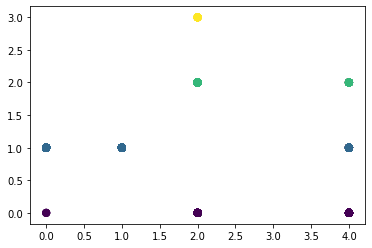

In [177]:
clusterX = clusterData.drop('GameType', axis =1)
model = KMeans(n_clusters = 4)
model.fit(clusterX)
y_kmeans = model.predict(clusterX)
plt.scatter(clusterData['WhiteElo'], y_kmeans
            , c=y_kmeans, s=50, cmap='viridis')


In [166]:
clusterData['GameType'].value_counts()

0    5167
4    2688
1    2504
2    1309
Name: GameType, dtype: int64

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [155]:
clusterData['GameType'].value_counts()

0    5167
4    2688
1    2504
2    1309
Name: GameType, dtype: int64

In [183]:
#clustering with distance_threshold as 2
part_df = clusterData
part_df_scaled = pd.DataFrame(scaler.fit_transform(part_df), columns=part_df.columns)
ag = AgglomerativeClustering(None, affinity='euclidean', distance_threshold=20)
ag.fit(part_df_scaled)
ag.labels_.max()

3

In [184]:
pca = PCA(2)
part_df_scaled_compress = pca.fit_transform(part_df_scaled)

In [185]:
pca_df = pd.DataFrame(part_df_scaled_compress, columns=['pca0', 'pca1'])
pca_df['labels'] = ag.labels_
pca_df['GameType'] = finalData.GameType
pca_df.head(2)

,pca0,pca1,labels,GameType
0,-0.457507,-0.317623,3,2.0
1,0.684368,-0.301769,2,2.0


Text(0, 0.5, 'PCA two')

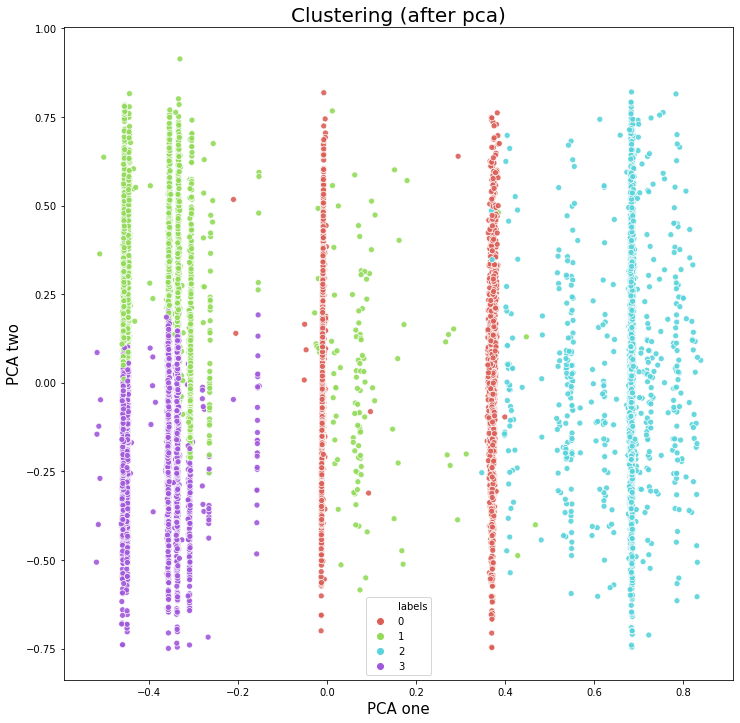

In [186]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    x= 'pca0',
    y= 'pca1',
    data = pca_df,
    hue = 'labels',
    palette=sns.color_palette("hls", pca_df.labels.unique().shape[0]),
    legend="full",
    alpha=0.9
)
plt.title('Clustering (after pca)', fontsize=20)
plt.xlabel('PCA one', fontsize=15)
plt.ylabel('PCA two', fontsize=15)

<h5>White Rating Prediction<h5>

In [329]:
predData = irData.copy()

In [330]:
predData = predData.drop('Moves',axis =1)

In [331]:
fTrainingSet, fTestSet = train_test_split(predData, test_size=0.2)

In [332]:
XTrain = fTrainingSet.drop('WhiteElo',axis =1)
XTrain = XTrain.drop('BlackElo',axis =1)
YTrain = fTrainingSet['WhiteElo']
XTest = fTestSet.drop('WhiteElo', axis =1)
XTest = XTest.drop('BlackElo', axis =1)
YTest = fTestSet['WhiteElo']

In [333]:
# Linear Regression Model Creation
lin_reg = LinearRegression()
lin_reg.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [334]:
#predict on test data split
y_test_predictions_lin_reg = lin_reg.predict(XTest)
# print (len(y_test_predictions_lin_reg))
lin_mse = mean_squared_error(YTest, (y_test_predictions_lin_reg))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

282.1474658252334


In [336]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(XTrain, YTrain)
y_test_predictions_lin_reg = clf.predict(XTest)

lin_mse = mean_squared_error(YTest, (y_test_predictions_lin_reg))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

282.3929106458132


C:\Users\ujwal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 731227543.4845685, tolerance: 198961.8742313709
  positive)


In [77]:
YTrain = fTrainingSet['BlackElo']
YTest = fTestSet['BlackElo']

In [78]:
# Linear Regression Model Creation
lin_reg = LinearRegression()
lin_reg.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#predict on test data split
y_test_predictions_lin_reg = lin_reg.predict(XTest)
# print (len(y_test_predictions_lin_reg))
lin_mse = mean_squared_error(YTest, (y_test_predictions_lin_reg))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

281.0923557489827


In [86]:
data['Black'].value_counts()

subs197         85
Meshter         84
vacnnm          82
LucasN2019      80
tigranpi        79
                ..
freligue         1
Sollasido        1
Bolsa            1
damnpotatoes     1
el_Panic         1
Name: Black, Length: 58759, dtype: int64

In [94]:
data[(data['Black']=='Meshter') | (data['White']=='Meshter')]['Event'].value_counts()

Rated Bullet game                                                  144
Rated Bullet tournament https://lichess.org/tournament/BuwfmCA9     13
Rated Bullet tournament https://lichess.org/tournament/eOLPciBz     10
Rated Bullet tournament https://lichess.org/tournament/UnhSOMxj      3
Name: Event, dtype: int64

In [348]:
bData = data.copy()

In [352]:
bData["RemTimeAftFirstMoveWhite"] = ""
bData["RemTimeAftLastMoveWhite"] = ""
bData["RemTimeAftFirstMoveBlack"] = ""
bData["RemTimeAftLastMoveBlack"] = ""
bData['WhiteTotalEval'] = ''
bData['BlackTotalEval'] = ''

In [353]:
for i in range(0, len(bData['Moves'])):
    if i%5000 == 0:
        print(i)
    try:
        if bData['Termination'][i]!='Abandoned' and bData['Moves'][i] is not None:
            if 'eval' in bData['Moves'][i]:
                splitres = bData['Moves'][i].split(' } ')
                whiteEvalSum = 0
                blackEvalSum = 0

                for j in range(0, len(splitres)):
                    if j%2 == 0:
                        if '%eval ' in splitres[j]:
                            #if splitres[j].split(']')[0].split('%eval ')[1]=='#1':
                            #    whiteEvalSum = whiteEvalSum + 1
                            if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
                                whiteEvalSum = whiteEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
                    else:
                        if '%eval ' in splitres[j]:
                            #if '%eval ' in splitres[j] and splitres[j].split(']')[0].split('%eval ')[1]=='#1':
                            #    blackEvalSum = blackEvalSum + 1
                            if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
                                blackEvalSum = blackEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
                bData['WhiteTotalEval'][i] = whiteEvalSum
                bData['BlackTotalEval'][i] = blackEvalSum

                if 'clk' in bData['Moves'][i]:
                    bData["RemTimeAftFirstMoveWhite"][i] = splitres[0].split(']')[1].split('%clk ')[1]
                    bData["RemTimeAftFirstMoveBlack"][i] = splitres[1].split(']')[1].split('%clk ')[1]
                    length = len(splitres)
                    if length%2 == 0:
                        if '%eval ' in splitres[length-2]:
                            bData["RemTimeAftLastMoveWhite"][i] = splitres[length-2].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-2]:
                            bData["RemTimeAftLastMoveWhite"][i] = splitres[length-2].split(']')[0].split('%clk ')[1]
                        if '%eval ' in splitres[length-1]:
                            bData["RemTimeAftLastMoveBlack"][i] = splitres[length-1].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-1]:
                            bData["RemTimeAftLastMoveBlack"][i] = splitres[length-1].split(']')[0].split('%clk ')[1]
                    else:
                        if '%eval ' in splitres[length-2]:
                            bData["RemTimeAftLastMoveBlack"][i] = splitres[length-2].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-2]:
                            bData["RemTimeAftLastMoveBlack"][i] = splitres[length-2].split(']')[0].split('%clk ')[1]
                        if '%eval ' in splitres[length-1]:
                            bData["RemTimeAftLastMoveWhite"][i] = splitres[length-1].split(']')[1].split('%clk ')[1]
                        elif '%eval ' not in splitres[length-1]:
                            bData["RemTimeAftLastMoveWhite"][i] = splitres[length-1].split(']')[0].split('%clk ')[1]


            elif 'clk' in bData['Moves'][i]:
                splitres = bData['Moves'][i].split(' } ')
                bData["RemTimeAftFirstMoveWhite"][i] = splitres[0].split("]")[0].split('%clk ')[1]
                bData["RemTimeAftFirstMoveBlack"][i] = splitres[1].split("]")[0].split('%clk ')[1]
                length = len(splitres)
                if length%2 == 0:
                    bData["RemTimeAftLastMoveWhite"][i] = splitres[length-2].split("]")[0].split('%clk ')[1]
                    bData["RemTimeAftLastMoveBlack"][i] = splitres[length-1].split("]")[0].split('%clk ')[1]
                else:
                    bData["RemTimeAftLastMoveBlack"][i] = splitres[length-2].split("]")[0].split('%clk ')[1]
                    bData["RemTimeAftLastMoveWhite"][i] = splitres[length-1].split("]")[0].split('%clk ')[1]
    except:
        print(i)


0


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value i

5000
10000
10266
15000
16130
20000
20133
24985
25000
30000
35000
40000
40634
41262
45000
46999
47725
50000
55000
55356
58310
59048
59570
59688
60000
65000


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


68227
69612
70000


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


75000
80000
83858
85000
88141
88540
89702
90000
95000
100000
105000
110000
112603
114159
114940
115000
117322
120000
125000
130000
130841
132043
132672
135000
135854
137647
140000
141842
143172
145000
147036
150000
153692
155000
160000
160269
160837
161300
165000
170000
175000
177459
177939
179601
180000
180151
185000
190000
195000
200000
202942
205000
208806
210000
212809
215000
217661
220000
225000
230000
233310
233938
235000
239675
240000
240401
245000
248032
250000
250986
251724
252246
252364
255000
260000
260903
262288
265000
270000
275000
276534
280000
280817
281216
282378
285000
290000
295000
300000
305000
305279
306835
307616
309998
310000
315000
320000
323517
324719
325000
325348
328530
330000
330323
334518
335000
335848
339712
340000
345000
346368
350000
352945
353513
353976
355000
360000
365000
370000
370135
370615
372277
372827
375000
380000


In [404]:
bData['a']=''
bData['b']=''
bData['c']=''
bData['d']=''
for i in range(0,bData.shape[0]):
    if i%5000==0:
        print(i)
    bData['a'][i] = pd.Timedelta(str(bData['RemTimeAftFirstMoveWhite'][i])).seconds
    bData['b'][i] = pd.Timedelta(str(bData['RemTimeAftLastMoveWhite'][i])).seconds
    bData['c'][i] = pd.Timedelta(str(bData['RemTimeAftFirstMoveBlack'][i])).seconds
    bData['d'][i] = pd.Timedelta(str(bData['RemTimeAftLastMoveBlack'][i])).seconds

bData['RemTimeAftFirstMoveWhite'] = bData['a']
bData['RemTimeAftLastMoveWhite'] = bData['b']
bData['RemTimeAftFirstMoveBlack'] = bData['c']
bData['RemTimeAftLastMoveBlack'] = bData['d']

bData = bData.drop('a',axis =1)
bData = bData.drop('b',axis =1)
bData = bData.drop('c',axis =1)
bData = bData.drop('d',axis =1)

0


C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ujwal\Anac

5000
10000
15000


KeyboardInterrupt: 

In [417]:
bData

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,...,RemTimeAftFirstMoveWhite,RemTimeAftLastMoveWhite,RemTimeAftFirstMoveBlack,RemTimeAftLastMoveBlack,WhiteTotalEval,BlackTotalEval,a,b,c,d
0,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/224ifIC9,Dikeuss,hikarufans,1-0,2019.09.01,00:00:04,1817,1806,7,...,0:05:00,0:01:20,0:10:00,0:03:34,,,00:05:00,00:01:20,00:10:00,00:03:34
1,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/JRbFTTJX,skankhunt593,Wosito,1-0,2019.09.01,00:00:04,1491,1419,6,...,0:03:00,0:00:01,0:03:00,0:00:00,,,00:03:00,00:00:01,00:03:00,00:00:00
2,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/TDlv0AjR,strompur,alchemist48,1-0,2019.09.01,00:00:04,2145,2015,4,...,0:10:00,0:04:41,0:10:00,0:04:09,,,00:10:00,00:04:41,00:10:00,00:04:09
3,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/9HriX6Rx,Geroz,ficher2016,1-0,2019.09.01,00:00:04,1702,1695,17,...,0:10:00,0:01:39,0:10:00,0:03:07,,,00:10:00,00:01:39,00:10:00,00:03:07
4,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/TECTBYsk,Violin_And_Viola,fasterfourier,1-0,2019.09.01,00:00:04,1683,1502,6,...,0:10:00,0:07:49,0:10:00,0:07:27,,,00:10:00,00:07:49,00:10:00,00:07:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384200,Rated Blitz game,https://lichess.org/QVW0gqAY,Kapwenge,Shubham18,1-0,2019.09.01,06:14:02,1629,1644,8,...,0:05:00,0:02:02,0:05:00,0:01:10,,,00:05:00,00:02:02,00:05:00,00:01:10
384201,Rated Blitz game,https://lichess.org/Kaz8VE91,Garoe1987,StreetChessKing,1-0,2019.09.01,06:14:03,1635,927,1,...,0:04:00,0:02:35,0:04:00,0:02:19,,,00:04:00,00:02:35,00:04:00,00:02:19
384202,Rated Blitz game,https://lichess.org/tTj6VvXq,airat1983,gudiaz,1-0,2019.09.01,06:14:03,1826,1703,5,...,0:03:00,0:00:42,0:03:00,0:00:02,,,00:03:00,00:00:42,00:03:00,00:00:02
384203,Rated Blitz game,https://lichess.org/EG7JMU29,javad1996,ercins71,0-1,2019.09.01,06:14:03,1807,1846,-6,...,0:03:00,0:00:01,0:03:00,0:00:41,,,00:03:00,00:00:01,00:03:00,00:00:41


In [408]:
bData.drop(bData[bData['RemTimeAftFirstMoveWhite']==''].index, inplace = True)
bData.drop(bData[bData['RemTimeAftLastMoveWhite']==''].index, inplace = True)
bData.drop(bData[bData['RemTimeAftFirstMoveBlack']==''].index, inplace = True)
bData.drop(bData[bData['RemTimeAftLastMoveBlack']==''].index, inplace = True)

In [409]:
bData['a'] = pd.to_datetime(bData['RemTimeAftFirstMoveWhite'],format= '%H:%M:%S').dt.time

In [411]:
bData['b'] = pd.to_datetime(bData['RemTimeAftLastMoveWhite'],format= '%H:%M:%S').dt.time
bData['c'] = pd.to_datetime(bData['RemTimeAftFirstMoveBlack'],format= '%H:%M:%S').dt.time
bData['d'] = pd.to_datetime(bData['RemTimeAftLastMoveBlack'],format= '%H:%M:%S').dt.time

In [419]:
bData.dtypes

Event                        object
Site                         object
White                        object
Black                        object
Result                       object
UTCDate                      object
UTCTime                      object
WhiteElo                      int64
BlackElo                      int64
WhiteRatingDiff               int64
BlackRatingDiff               int64
WhiteTitle                  float64
ECO                          object
Opening                      object
TimeControl                  object
Termination                  object
Moves                        object
RemTimeAftFirstMoveWhite     object
RemTimeAftLastMoveWhite      object
RemTimeAftFirstMoveBlack     object
RemTimeAftLastMoveBlack      object
WhiteTotalEval               object
BlackTotalEval               object
a                            object
b                            object
c                            object
d                            object
dtype: object

In [422]:
pd.to_timedelta(bData['a'], unit='s')

ValueError: Invalid type for timedelta scalar: <class 'datetime.time'>

In [356]:
pd.Timedelta(str(bData['RemTimeAftFirstMoveWhite'])).seconds

ValueError: invalid unit abbreviation: 


In [367]:
pd.Timedelta(bData['RemTimeAftFirstMoveWhite']).seconds

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible

<h2>Upsets<h2>

In [357]:
irData.shape

(23271, 53)

In [358]:
irData['isUpset']=0

In [360]:
for i in range(0,len(irData)):
    if irData['Result'][i]== 0:
        if irData['BlackElo'][i]<irData['WhiteElo'][i]:
            irData['isUpset'][i]=1
    if irData['Result'][i]== 1:
        if irData['BlackElo'][i]>irData['WhiteElo'][i]:
            irData['isUpset'][i]=1

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [374]:
upsetData = irData.copy()

In [375]:
irData.dtypes

Result                        int32
WhiteElo                      int64
BlackElo                      int64
WhiteRatingDiff               int64
BlackRatingDiff               int64
ECO                           int32
TimeControl                   int32
Termination                   int32
Moves                        object
GameType                      int32
MovesCount                    int32
WhiteCaptured                 int32
BlackCaptured                 int32
EloDifference                 int32
RemTimeAftFirstMoveWhite      int32
RemTimeAftLastMoveWhite       int32
RemTimeAftFirstMoveBlack      int32
RemTimeAftLastMoveBlack       int32
WhiteTotalEval              float64
BlackTotalEval              float64
GoodMoveWhite                 int64
MistakeWhite                  int64
BrilliantMoveWhite            int64
BlunderWhite                  int64
InterestingMoveWhite          int64
DubiousMoveWhite              int64
GoodMoveBlack                 int64
MistakeBlack                

In [377]:
upsetData['KingCastlingWhite'] = LabelEncoder().fit_transform(upsetData['KingCastlingWhite'])
upsetData['QueenCastlingWhite'] = LabelEncoder().fit_transform(upsetData['QueenCastlingWhite'])
upsetData['KingCastlingBlack'] = LabelEncoder().fit_transform(upsetData['KingCastlingBlack'])
upsetData['QueenCastlingBlack'] = LabelEncoder().fit_transform(upsetData['QueenCastlingBlack'])
upsetData['CheckmateDone'] = LabelEncoder().fit_transform(upsetData['CheckmateDone'])

In [378]:
upsetData = upsetData.drop('Moves',axis =1)

In [379]:
fTrainingSet, fTestSet = train_test_split(upsetData, test_size=0.2)

In [380]:
XTrain = fTrainingSet.drop('isUpset',axis =1)
YTrain = fTrainingSet['isUpset']
XTest = fTestSet.drop('isUpset', axis =1)
YTest = fTestSet['isUpset']

In [382]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(XTrain, YTrain) 
predicted = neigh.predict(XTest)
acc = accuracy_score(YTest, predicted)
print(acc)

0.7963480128893663


In [387]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(XTrain, YTrain)
predicted = clf.predict(XTest)


C:\Users\ujwal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [388]:

acc = accuracy_score(YTest, predicted)
print(acc)

0.5834586466165413


In [389]:
lin_mse = mean_squared_error(YTest, (predicted))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.6454001498167309


<h2>END<h2>

In [ ]:
#export_csv = evalData.to_csv (r'C:\Users\ujwal\data\stonybrook\fall2019\dataScienceFundamentals\project\dataset\evalData.csv', index = None, header=True)

In [ ]:
#goodmoves = dataNotNull[dataNotNull['Moves'].str.contains("\$") & dataNotNull['Moves'].str.contains("eval")]

In [ ]:
#a = goodmoves['Moves'][86]

In [ ]:
#"$" in a

In [ ]:
#goodmoves.shape

In [ ]:
evalData['GoodMoveWhite'] = 0
evalData['MistakeWhite'] = 0
evalData['BrilliantMoveWhite'] = 0
evalData['BlunderWhite'] = 0
evalData['InterestingMoveWhite'] = 0
evalData['DubiousMoveWhite'] = 0
evalData['GoodMoveBlack'] = 0
evalData['MistakeBlack'] = 0
evalData['BrilliantMoveBlack'] = 0
evalData['BlunderBlack'] = 0
evalData['InterestingMoveBlack'] = 0
evalData['DubiousMoveBlack'] = 0

In [ ]:
pieces = ['R','K','B','K','Q']

In [ ]:
evalData['RookMovesWhite'] = 0
evalData['KnightMovesWhite'] = 0
evalData['BishopMovesWhite'] = 0
evalData['KingMovesWhite'] = 0
evalData['QueenMovesWhite'] = 0
evalData['PawnMovesWhite'] = 0
evalData['KingCastlingWhite'] = False
evalData['QueenCastlingWhite'] = False

evalData['RookMovesBlack'] = 0
evalData['KnightMovesBlack'] = 0
evalData['BishopMovesBlack'] = 0
evalData['KingMovesBlack'] = 0
evalData['QueenMovesBlack'] = 0
evalData['PawnMovesBlack'] = 0
evalData['KingCastlingBlack'] = False
evalData['QueenCastlingBlack'] = False

In [ ]:
evalData['ChecksByWhite'] = 0
evalData['ChecksByBlack'] = 0
evalData['CheckmateDone'] = False
evalData['PawnPromotionWhite'] = 0
evalData['PawnPromotionBlack'] = 0


In [ ]:
#evalData.reset_index(inplace=True, drop=True)

In [ ]:
for i in range(0,evalData.shape[0]):
    if i%1000 == 0:
        print(i)
    if evalData['Termination'][i]!='Abandoned' and evalData['Moves'][i] is not None:
        if "$" in evalData['Moves'][i]:
            splitres = evalData['Moves'][i].split(' } ')
            
            for j in range(0, len(splitres)):
                move = splitres[j].split(' ')
                if j%2 == 0:
                    if move[1].startswith('R'):
                        evalData['RookMovesWhite'][i] = evalData['RookMovesWhite'][i] +1
                    elif move[1].startswith('N'):
                        evalData['KnightMovesWhite'][i] = evalData['KnightMovesWhite'][i] +1
                    elif move[1].startswith('B'):
                        evalData['BishopMovesWhite'][i] = evalData['BishopMovesWhite'][i] +1
                    elif move[1].startswith('K'):
                        evalData['KingMovesWhite'][i] = evalData['KingMovesWhite'][i] +1
                    elif move[1].startswith('Q'):
                        evalData['QueenMovesWhite'][i] = evalData['QueenMovesWhite'][i] +1
                    elif move[1]== 'O-O':
                        evalData['KingCastlingWhite'][i] = True
                    elif move[1]== 'O-O-O':
                        evalData['QueenCastlingWhite'][i] = True
                    else:
                        evalData['PawnMovesWhite'][i] = evalData['PawnMovesWhite'][i] +1
                        
                    if move[1].endswith('+'):
                        evalData['ChecksByWhite'][i] = evalData['ChecksByWhite'][i] +1
                        
                    if '=' in move[1]:
                        evalData['PawnPromotionWhite'][i] = evalData['PawnPromotionWhite'][i] +1
                        
                    if '$' in splitres[j]:
                        if move[2] == '$1':
                            evalData['GoodMoveWhite'][i] = evalData['GoodMoveWhite'][i] +1
                        elif move[2] == '$2':
                            evalData['MistakeWhite'][i] = evalData['MistakeWhite'][i] +1
                        elif move[2] == '$3':
                            evalData['BrilliantMoveWhite'][i] = evalData['BrilliantMoveWhite'][i]+1
                        elif move[2] == '$4':
                            evalData['BlunderWhite'][i] = evalData['BlunderWhite'][i] + 1
                        elif move[2] == '$5':
                            evalData['InterestingMoveWhite'][i] = evalData['InterestingMoveWhite'][i] +1
                        elif move[2] == '$6':
                            evalData['DubiousMoveWhite'][i] = evalData['DubiousMoveWhite'][i] +1
                            
                else:
                    if move[1].startswith('R'):
                        evalData['RookMovesBlack'][i] = evalData['RookMovesBlack'][i] +1
                    elif move[1].startswith('N'):
                        evalData['KnightMovesBlack'][i] = evalData['KnightMovesBlack'][i] +1
                    elif move[1].startswith('B'):
                        evalData['BishopMovesBlack'][i] = evalData['BishopMovesBlack'][i] +1
                    elif move[1].startswith('K'):
                        evalData['KingMovesBlack'][i] = evalData['KingMovesBlack'][i] +1
                    elif move[1].startswith('Q'):
                        evalData['QueenMovesBlack'][i] = evalData['QueenMovesBlack'][i] +1
                    elif move[1]== 'O-O':
                        evalData['KingCastlingBlack'][i] = True
                    elif move[1]== 'O-O-O':
                        evalData['QueenCastlingBlack'][i] = True
                    else:
                        evalData['PawnMovesBlack'][i] = evalData['PawnMovesBlack'][i] +1
                    
                    if move[1].endswith('+'):
                        evalData['ChecksByBlack'][i] = evalData['ChecksByBlack'][i] +1
                        
                    if '=' in move[1]:
                        evalData['PawnPromotionBlack'][i] = evalData['PawnPromotionBlack'][i] +1
                        
                    if '$' in splitres[j]:
                        if move[2] == '$1':
                            evalData['GoodMoveBlack'][i][i] = evalData['GoodMoveBlack'][i] +1
                        elif move[2] == '$2':
                            evalData['MistakeBlack'][i] = evalData['MistakeBlack'][i] +1
                        elif move[2] == '$3':
                            evalData['BrilliantMoveBlack'][i] = evalData['BrilliantMoveBlack'][i] +1
                        elif move[2] == '$4':
                            evalData['BlunderBlack'][i] = evalData['BlunderBlack'][i] + 1
                        elif move[2] == '$5':
                            evalData['InterestingMoveBlack'][i] = evalData['InterestingMoveBlack'][i] +1
                        elif move[2] == '$6':
                            evalData['DubiousMoveBlack'][i] = evalData['DubiousMoveBlack'][i] +1
            
            if splitres[len(splitres)-1].split(' ')[1].endswith('#'):
                evalData['CheckmateDone'][i] = True
            

In [ ]:
evalData

In [ ]:
#evalData.reset_index(inplace=True, drop=True)
print(evalData['Moves'][16])
evalData.loc[16,:]

In [ ]:
evalData.columns

In [ ]:
x = dataNotNull[dataNotNull['Moves'].str.contains("\=")] 

In [ ]:
x['Moves'][16]

In [ ]:
m = '1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e5 { [%eval 0.37] [%clk 0:05:00] } 2. Nc3 { [%eval 0.13] [%clk 0:04:59] } 2... Nc6 { [%eval 0.25] [%clk 0:04:59] } 3. Nf3 { [%eval 0.16] [%clk 0:04:55] } 3... Bb4 { [%eval 0.47] [%clk 0:04:47] } 4. d4 { [%eval -0.02] [%clk 0:04:53] } 4... f6 $6 { [%eval 0.72] [%clk 0:04:28] } 5. Bd2 { [%eval 0.87] [%clk 0:04:49] } 5... exd4 { [%eval 0.93] [%clk 0:04:25] } 6. Nb5 { [%eval 0.51] [%clk 0:04:45] } 6... Bxd2+ $6 { [%eval 1.19] [%clk 0:04:14] } 7. Qxd2 { [%eval 0.9] [%clk 0:04:43] } 7... a6 { [%eval 1.09] [%clk 0:04:07] } 8. Nbxd4 { [%eval 1.05] [%clk 0:04:40] } 8... Qe7 $6 { [%eval 1.98] [%clk 0:03:56] } 9. Bd3 $2 { [%eval 0.95] [%clk 0:04:18] } 9... d5 $2 { [%eval 2.74] [%clk 0:03:23] } 10. Nxc6 $6 { [%eval 2.07] [%clk 0:04:02] } 10... bxc6 { [%eval 1.87] [%clk 0:03:21] } 11. Qe2 $6 { [%eval 1.29] [%clk 0:03:35] } 11... dxe4 $2 { [%eval 2.37] [%clk 0:03:14] } 12. Bxe4 { [%eval 2.26] [%clk 0:03:32] } 12... Bd7 $4 { [%eval 5.37] [%clk 0:02:58] } 13. O-O-O { [%eval 4.72] [%clk 0:03:21] } 13... Nh6 $4 { [%eval 11.48] [%clk 0:02:46] } 14. Rxd7 { [%eval 10.95] [%clk 0:03:13] } 14... Qc5 $6 { [%eval #8] [%clk 0:01:54] } 15. Bxc6+ { [%eval #7] [%clk 0:03:00] } 15... Kf8 { [%eval #6] [%clk 0:01:51] } 16. Bxa8 $6 { [%eval 33.8] [%clk 0:02:50] } 16... Nf7 $6 { [%eval #4] [%clk 0:01:39] } 17. Rhd1 $6 { [%eval 27.95] [%clk 0:02:39] } 17... g6 $6 { [%eval #5] [%clk 0:01:35] } 18. Bd5 { [%eval #5] [%clk 0:02:32] } 18... Nd6 { [%eval #1] [%clk 0:01:18] } 19. Qe7# { [%clk 0:02:28] }'

In [ ]:
d = evalData.copy()

In [ ]:
d['GameType'] = pd.np.where(d.Event.str.contains("Blitz"), "Blitz",
            pd.np.where(d.Event.str.contains("Bullet"), "Bullet",
                        pd.np.where(d.Event.str.contains("Rapid"), "Rapid",
                                    pd.np.where(d.Event.str.contains("Classical"), "Classical",
                                                "Correspondence"))))

In [ ]:
d

In [ ]:
r = (d['WhiteElo'].max() - d['WhiteElo'].min())/3

In [ ]:
def addRating(row):
    if row['WhiteElo']<=d['WhiteElo'].min()+r :
        return 'low'
    elif row['WhiteElo']<=d['WhiteElo'].max()-r :
        return 'medium'
    return 'high'

In [ ]:
d['Rating'] = d.apply(addRating, axis = 1)

In [ ]:
d

In [ ]:
d.columns

In [ ]:
d['indexCol'] = d.index

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
d['Termination'] = LabelEncoder().fit_transform(d['Termination'])
d['KingCastlingWhite'] = LabelEncoder().fit_transform(d['KingCastlingWhite'])
d['QueenCastlingWhite'] = LabelEncoder().fit_transform(d['QueenCastlingWhite'])
d['KingCastlingBlack'] = LabelEncoder().fit_transform(d['KingCastlingBlack'])
d['QueenCastlingBlack'] = LabelEncoder().fit_transform(d['QueenCastlingBlack'])
d['PawnPromotionWhite'] = LabelEncoder().fit_transform(d['PawnPromotionWhite'])
d['PawnPromotionBlack'] = LabelEncoder().fit_transform(d['PawnPromotionBlack'])
d['GameType'] = LabelEncoder().fit_transform(d['GameType'])
d['Rating'] = LabelEncoder().fit_transform(d['Rating'])

In [ ]:
myCols = ['WhiteElo', 'BlackElo',  'Termination', 'MistakeWhite',  'BlunderWhite',
        'DubiousMoveWhite',
       'MistakeBlack', 'BlunderBlack',
       'DubiousMoveBlack', 'RookMovesWhite',
       'KnightMovesWhite', 'BishopMovesWhite', 'KingMovesWhite',
       'QueenMovesWhite', 'PawnMovesWhite', 'RookMovesBlack', 'KnightMovesBlack',
       'BishopMovesBlack', 'KingMovesBlack', 'QueenMovesBlack',
       'PawnMovesBlack', 'ChecksByWhite', 'ChecksByBlack', 'GameType', 'Rating']
r = d[myCols].corr(method='pearson',min_periods=1) 
plt.figure(figsize=(15, 10) )
ax = sns.heatmap(r, vmin=-1, vmax=1, xticklabels=r.columns, 
                      yticklabels=r.columns, cmap='RdBu_r', annot=False, linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
evalData['DubiousMoveWhite'].value_counts()

In [ ]:
d['GameType'].value_counts()

In [ ]:
d[d['GameType']=='Blitz'].iloc[0:783,:]

In [ ]:
evalData

In [ ]:
d1 = d[d['GameType']=='Classical']

In [ ]:
d1 = d1.append(d[d['GameType']=='Blitz'].iloc[0:783,:], ignore_index = True)
d1 = d1.append(d[d['GameType']=='Rapid'].iloc[0:783,:], ignore_index = True)
d1 = d1.append(d[d['GameType']=='Bullet'].iloc[0:783,:], ignore_index = True)

In [ ]:
d1

In [ ]:
s = d1['BlunderWhite'].groupby(d1['GameType']).value_counts()

In [ ]:
s.values

In [ ]:
a= pd.DataFrame({"GameType":['Blitz','Blitz','Blitz','Blitz','Blitz','Bullet','Bullet','Bullet','Bullet','Bullet',
                            'Classical','Classical','Classical','Classical','Classical', 'Rapid','Rapid','Rapid',
                            'Rapid','Rapid',], 
                         "BlunderWhite":[1,0,2,3,4,1,2,0,3,4,1,0,2,3,4,1,0,2,3,4],
                "Count":[204,186,178,93,58,197,174,165,102,68,235,186,154,89,42,240,206,153,95,38]})

In [ ]:
ax = sns.lineplot(x="BlunderWhite", y="Count", hue="GameType",data=a)
plt.figure(figsize=(15,20))

In [ ]:
sns.lmplot( x="indexCol", y="MistakeWhite", data=d.iloc[:1000,:], fit_reg=False, hue='GameType', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [ ]:
d2 = evalData.copy()

In [ ]:
d2

In [ ]:
r = (d2['WhiteElo'].max() - d2['WhiteElo'].min())/3
d2['Rating'] = d2.apply(addRating, axis = 1)

In [ ]:
d2['Rating'].value_counts()

In [ ]:
d3 = d2[d2['Rating']=='high']
d3 = d3.append(d2[d2['Rating']=='low'].iloc[0:844,:], ignore_index = True)
d3 = d3.append(d2[d2['Rating']=='medium'].iloc[0:844,:], ignore_index = True)

In [ ]:
s2 = d3['BlunderWhite'].groupby(d3['Rating']).value_counts()

In [ ]:
s2

In [ ]:
s2.values[0:6]

In [ ]:
b= pd.DataFrame({"Rating":['high','high','high','high','high','high', 'low','low','low','low','low','low','medium',
                            'medium','medium','medium','medium','medium',], 
                         "BlunderWhite":[0,1,2,3,4,5,1,2,0,3,4,5,1,0,2,3,4,5],
                "Count":[324, 232, 143,  76,  35,  19, 218, 209, 138, 109,  54,  52, 239, 218, 168, 104,  50,  35]})

In [ ]:
bx = sns.lineplot(x="BlunderWhite", y="Count", hue="Rating",data=b)
plt.figure(figsize=(15,20))